#### KL Divergence

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.special import kl_div
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [2]:
def p(x):
    return 0.5*norm.pdf(x, loc=0, scale=1) + 0.5*norm.pdf(x, loc=8, scale=1)

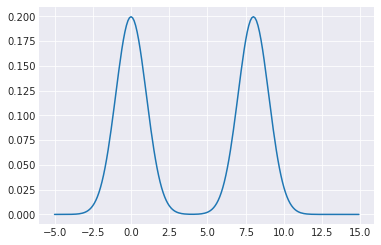

In [3]:
x = np.arange(-5, 15, 0.1)
plt.plot(x, p(x))

In [4]:
min_kld = np.inf
best_mu = np.inf

# exhaustive search. evaluates every possible solution.
for mu in np.arange(-5,15,0.1):
    for sigma in np.arange(0.1, 10, 0.1):
        q = norm(loc=mu, scale=sigma)
        
        kld = kl_div(q.pdf(x), p(x)).sum()
        if kld<min_kld:
            min_kld = kld
            best_mu = mu
            best_sigma = sigma

In [5]:
best_mu, best_sigma, min_kld

(7.999999999999954, 1.0, 6.9305353623875545)

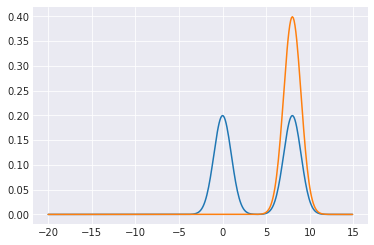

In [6]:
x = np.arange(-20, 15, 0.1)
plt.plot(x, p(x))
plt.plot(x, norm.pdf(x, loc=best_mu, scale=best_sigma))

In [7]:
min_kld = np.inf
best_mu = np.inf

for mu in np.arange(-5,15,0.1):
    for sigma in np.arange(0.1, 10, 0.1):
        q = norm(loc=mu, scale=sigma)
        
        kld = kl_div( p(x), q.pdf(x)).sum()
        if kld<min_kld:
            min_kld = kld
            best_mu = mu
            best_sigma = sigma

In [8]:
best_mu, best_sigma, min_kld

(4.099999999999968, 4.2, 7.192820612706118)

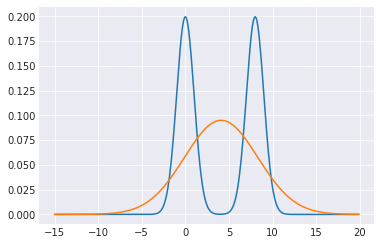

In [9]:
x = np.arange(-15, 20, 0.1)
plt.plot(x, p(x))
plt.plot(x, norm.pdf(x, loc=best_mu, scale=best_sigma))

The KLD is not symmetric, and different formulations induce different behaviour. $KL(q||p)$ is likely to underestimate the variance, whilst $KL(p||q)$ is likely to overestimate it.